# Load and Process Data
Import required libraries and load data from JSON files. Extract metrics including local/global path norm, training/test loss and accuracy.

In [1]:
import json
import matplotlib.pyplot as plt

# Define file paths for client 2
file_paths = [
    "/Users/max/Fedn_Project/CIFAR10-Adam-Balanced-iid/metadata_2_10.0.json",
    "/Users/max/Fedn_Project/CIFAR10-Adam-Balanced-iid/report_2_10.0.json"
]

# Initialize lists to store metrics
client2_local_path_norm = []
client2_global_path_norm = []
client2_training_loss = []
client2_training_accuracy = []
client2_test_loss = []
client2_test_accuracy = []

# Load data from report file
with open(file_paths[1], 'r') as file:
    data = json.load(file)
    client2_global_path_norm = [entry['global_path_norm'] for entry in data]
    client2_training_loss = [entry['training_loss'] for entry in data]
    client2_training_accuracy = [entry['training_accuracy'] for entry in data]
    client2_test_loss = [entry['test_loss'] for entry in data]
    client2_test_accuracy = [entry['test_accuracy'] for entry in data]

# Load data from metadata file
with open(file_paths[0], 'r') as file:
    data = json.load(file)
    client2_local_path_norm = [entry['local_path_norm'] for entry in data]

# Create Visualization Figure
Set up the matplotlib figure with dual Y-axes for plotting different metrics.

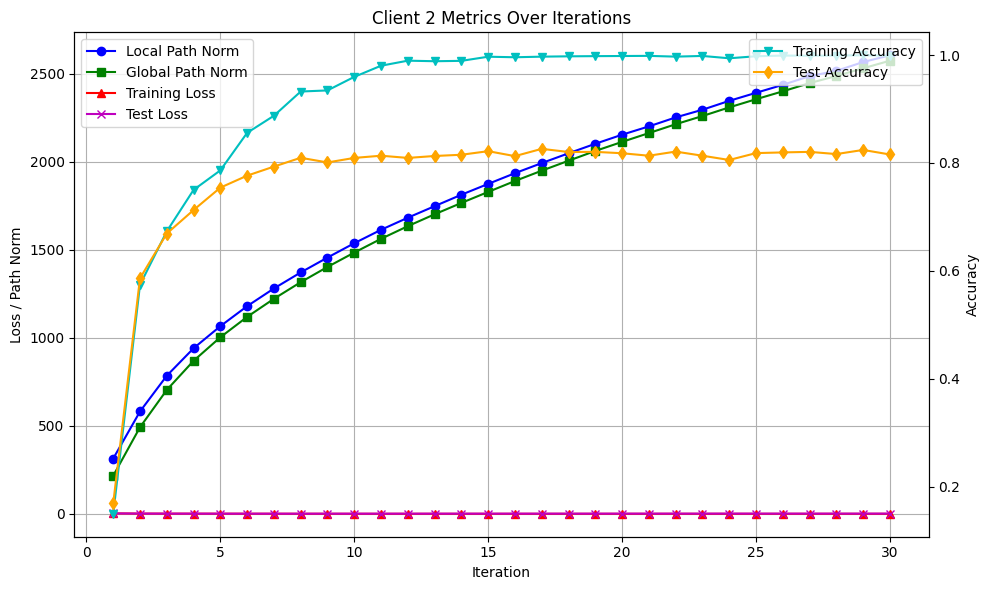

In [2]:
# Create Visualization Figure

# Create figure and dual Y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))
iterations = range(1, len(client2_local_path_norm) + 1)

# Plot data for left Y-axis
ax1.plot(iterations, client2_local_path_norm, marker='o', linestyle='-', label='Local Path Norm', color='b')
ax1.plot(iterations, client2_global_path_norm, marker='s', linestyle='-', label='Global Path Norm', color='g')
ax1.plot(iterations, client2_training_loss, marker='^', linestyle='-', label='Training Loss', color='r')
ax1.plot(iterations, client2_test_loss, marker='x', linestyle='-', label='Test Loss', color='m')

ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss / Path Norm')
ax1.set_title('Client 2 Metrics Over Iterations')
ax1.grid(True)
ax1.legend(loc='upper left')

# Plot data for right Y-axis
ax2 = ax1.twinx()
ax2.plot(iterations, client2_training_accuracy, marker='v', linestyle='-', label='Training Accuracy', color='c')
ax2.plot(iterations, client2_test_accuracy, marker='d', linestyle='-', label='Test Accuracy', color='orange')

ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper right')

# Display the figure
plt.tight_layout()
plt.show()

# Plot Loss and Path Norm
Plot local/global path norm and training/test loss on the left Y-axis with different markers and colors.

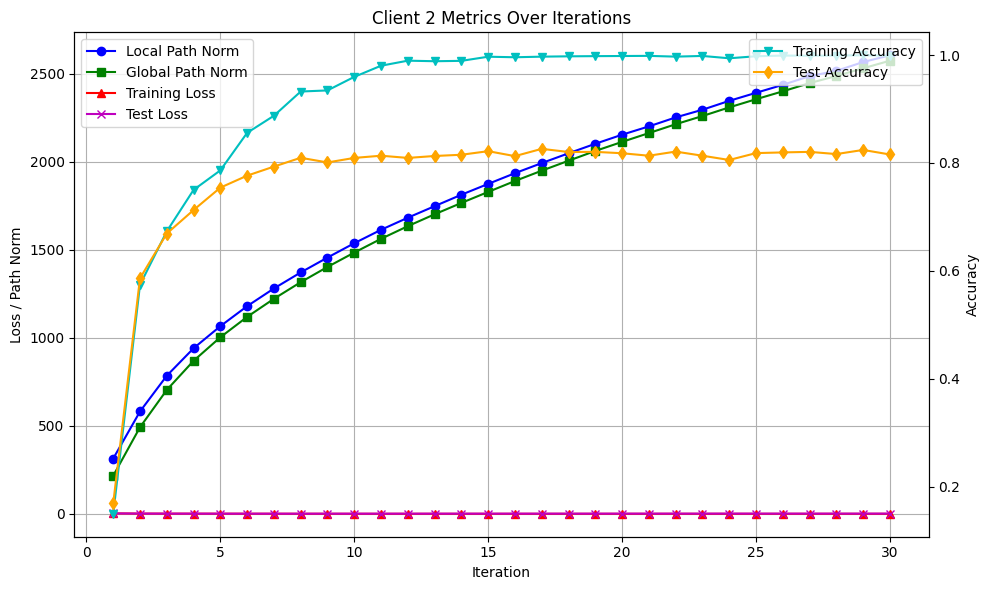

In [3]:
# Plot Loss and Path Norm

# Create figure and dual Y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))
iterations = range(1, len(client2_local_path_norm) + 1)

# Plot data for left Y-axis
ax1.plot(iterations, client2_local_path_norm, marker='o', linestyle='-', label='Local Path Norm', color='b')
ax1.plot(iterations, client2_global_path_norm, marker='s', linestyle='-', label='Global Path Norm', color='g')
ax1.plot(iterations, client2_training_loss, marker='^', linestyle='-', label='Training Loss', color='r')
ax1.plot(iterations, client2_test_loss, marker='x', linestyle='-', label='Test Loss', color='m')

ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss / Path Norm')
ax1.set_title('Client 2 Metrics Over Iterations')
ax1.grid(True)
ax1.legend(loc='upper left')

# Plot data for right Y-axis
ax2 = ax1.twinx()
ax2.plot(iterations, client2_training_accuracy, marker='v', linestyle='-', label='Training Accuracy', color='c')
ax2.plot(iterations, client2_test_accuracy, marker='d', linestyle='-', label='Test Accuracy', color='orange')

ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper right')

# Display the figure
plt.tight_layout()
plt.show()

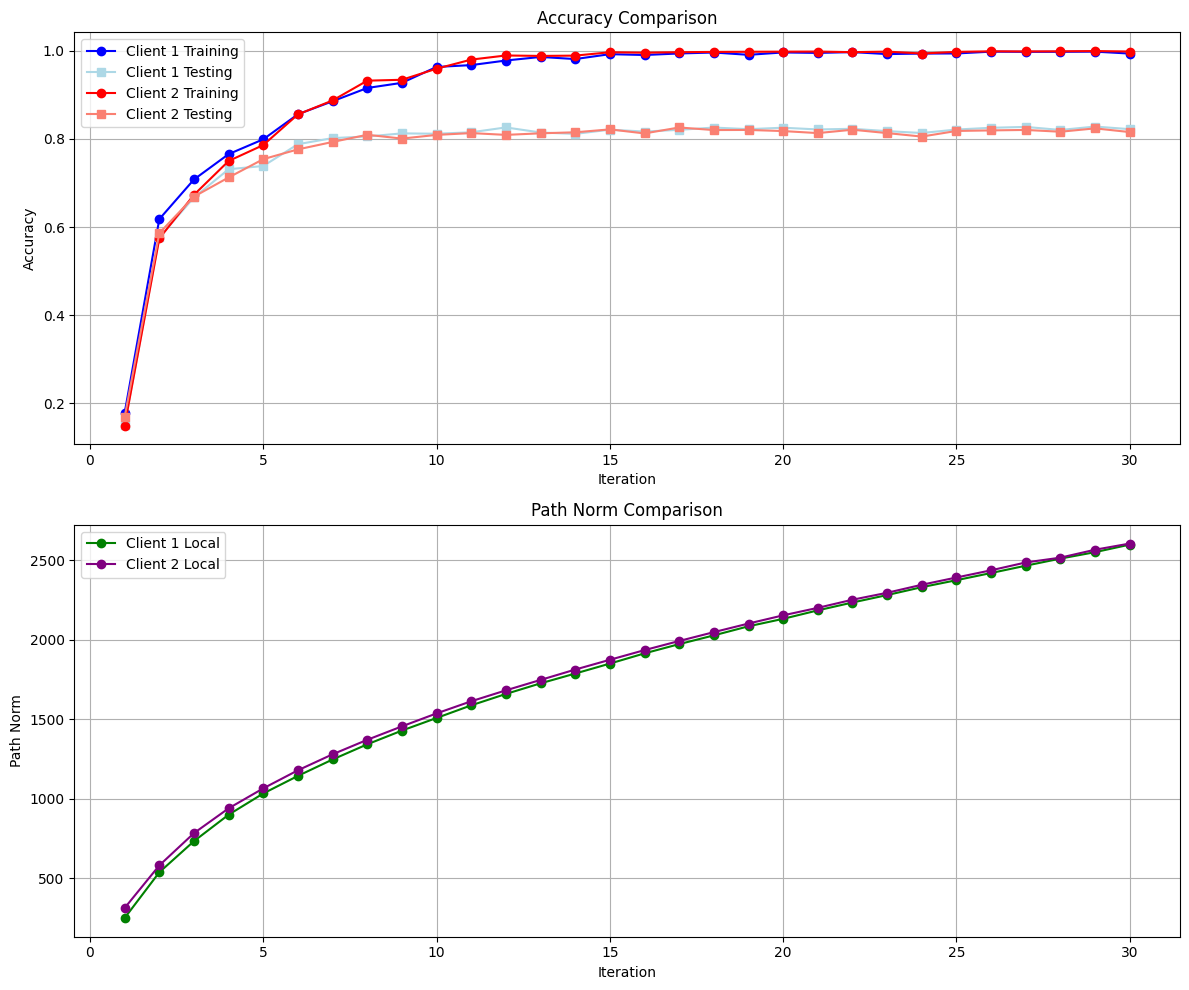

In [5]:
import json
import matplotlib.pyplot as plt

# Define file paths for both clients
client1_files = [
    "/Users/max/Fedn_Project/CIFAR10-Adam-Balanced-iid/metadata_1_10.0.json",
    "/Users/max/Fedn_Project/CIFAR10-Adam-Balanced-iid/report_1_10.0.json"
]

client2_files = [
    "/Users/max/Fedn_Project/CIFAR10-Adam-Balanced-iid/metadata_2_10.0.json", 
    "/Users/max/Fedn_Project/CIFAR10-Adam-Balanced-iid/report_2_10.0.json"
]

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot Accuracy Comparison
for files, client_name, color1, color2 in [
    (client1_files, 'Client 1', 'blue', 'lightblue'),
    (client2_files, 'Client 2', 'red', 'salmon')
]:
    # Load data
    with open(files[1], 'r') as f:
        data = json.load(f)
        train_acc = [entry['training_accuracy'] for entry in data]
        test_acc = [entry['test_accuracy'] for entry in data]
    
    iterations = range(1, len(train_acc) + 1)
    ax1.plot(iterations, train_acc, marker='o', linestyle='-', 
             label=f'{client_name} Training', color=color1)
    ax1.plot(iterations, test_acc, marker='s', linestyle='-', 
             label=f'{client_name} Testing', color=color2)

# Plot Path Norm Comparison
for files, client_name, color1, color2 in [
    (client1_files, 'Client 1', 'green', 'lightgreen'),
    (client2_files, 'Client 2', 'purple', 'plum')
]:
    # Load data
    with open(files[0], 'r') as f:
        data = json.load(f)
        local_norm = [entry['local_path_norm'] for entry in data]
    with open(files[1], 'r') as f:
        data = json.load(f)
        global_norm = [entry['global_path_norm'] for entry in data]
    
    iterations = range(1, len(local_norm) + 1)
    ax2.plot(iterations, local_norm, marker='o', linestyle='-', 
             label=f'{client_name} Local', color=color1)
    # ax2.plot(iterations, global_norm, marker='s', linestyle='-', 
    #          label=f'{client_name} Global', color=color2)

# Configure plots
ax1.set_title('Accuracy Comparison')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Accuracy')
ax1.grid(True)
ax1.legend()

ax2.set_title('Path Norm Comparison')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Path Norm')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()